In [2]:
pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setu

In [4]:
!pip install prophet
!pip install gym


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
import gym
from gym import spaces
import random


Data Preparation

In [11]:
# Load Datasets
df1 = pd.read_excel('/content/Historical Sales Data.xlsx')
df2 = pd.read_excel('/content/Inventory Levels Dataset.xlsx')
df3 = pd.read_excel('/content/Market Trends.xlsx')
df4 = pd.read_excel('/content/Supplier Performance Data.xlsx')

In [12]:
df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ProductID,ProductCategory,QuantitySold,SalesDate,CustomerID
0,1,Industrial A,50,2024-08-01,101
1,2,Industrial B,30,2024-08-01,102
2,3,Industrial C,20,2024-08-02,103
3,4,Industrial A,60,2024-08-03,104
4,5,Industrial B,25,2024-08-03,105
...,...,...,...,...,...
95,96,Industrial D,55,2024-09-19,196
96,97,Industrial A,65,2024-09-20,197
97,98,Industrial B,40,2024-09-20,198
98,99,Industrial C,30,2024-09-21,199


In [13]:
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ProductID,ProductCategory,CurrentInventory,Stockouts,Overstock,InventoryTurnoverRate
0,1,Industrial A,120,2,1,4.5
1,2,Industrial B,80,1,0,6.2
2,3,Industrial C,50,3,2,5.0
3,4,Industrial D,200,0,5,2.8
4,5,Industrial A,90,1,0,5.1
5,6,Industrial B,110,2,3,4.0
6,7,Industrial C,70,0,1,6.5
7,8,Industrial D,150,1,2,3.2
8,9,Industrial A,130,0,4,3.8
9,10,Industrial B,60,4,2,7.0


In [14]:
df3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,EconomicIndicator,MarketTrend,SeasonalDemand,ExternalFactor
0,2024-01-01,0.032,Upward,High,Tech Industry Boom
1,2024-01-15,0.031,Stable,Medium,Oil Price Drop
2,2024-02-01,0.033,Upward,Medium,Inflation Rise
3,2024-02-15,0.034,Downward,Low,Supply Chain Disruption
4,2024-03-01,0.035,Upward,High,Economic Growth
5,2024-03-15,0.036,Stable,High,Market Saturation
6,2024-04-01,0.032,Downward,Medium,Interest Rate Increase
7,2024-04-15,0.033,Upward,High,Seasonal Trends
8,2024-05-01,0.031,Stable,Low,Economic Recession
9,2024-05-15,0.030,Downward,Medium,Trade Tariffs


In [15]:
df4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SupplierID,SupplierName,DeliveryTime (Days),OnTimeDeliveryRate (%),ReliabilityScore (1-10),PerformanceRating (1-5)
0,1,Apex Supplies,3,95,9,4.5
1,2,Bright Logistics,5,85,7,3.8
2,3,CoreTech Distribution,2,98,8,4.7
3,4,Delta Industries,7,80,6,3.5
4,5,Echo Suppliers,4,90,8,4.2
5,6,Falcon Freight,6,87,7,4.0
6,7,Golden Gate Supplies,3,92,9,4.6
7,8,Horizon Logistics,8,75,5,3.2
8,9,Impact Distribution,4,88,8,4.1
9,10,Jetstream Supplies,5,83,6,3.7


In [16]:
# Preprocess Historical Sales Data
df1['SalesDate'] = pd.to_datetime(df1['SalesDate'])
df1.set_index('SalesDate', inplace=True)
df1.sort_index(inplace=True)

# Preprocess Inventory Levels Data
df2['ProductID'] = df2['ProductID'].astype(str)  # Ensure ProductID is a string
df2['InventoryTurnoverRate'] = df2['InventoryTurnoverRate'].astype(float)

In [17]:
# Preprocess Market Trends Data
df3['Date'] = pd.to_datetime(df3['Date'])
df3.set_index('Date', inplace=True)
df3.sort_index(inplace=True)

# Preprocess Supplier Performance Data
df4['SupplierID'] = df4['SupplierID'].astype(str)  # Ensure SupplierID is a string

#  Exploratory Data Analysis (EDA)
print("Historical Sales Data:")
print(df1.head())

print("Inventory Levels Data:")
print(df2.head())

print("Market Trends Data:")
print(df3.head())

print("Supplier Performance Data:")
print(df4.head())

Historical Sales Data:
            ProductID ProductCategory  QuantitySold  CustomerID
SalesDate                                                      
2024-08-01          1    Industrial A            50         101
2024-08-01          2    Industrial B            30         102
2024-08-02          3    Industrial C            20         103
2024-08-03          4    Industrial A            60         104
2024-08-03          5    Industrial B            25         105
Inventory Levels Data:
  ProductID ProductCategory  CurrentInventory  Stockouts  Overstock  \
0         1    Industrial A               120          2          1   
1         2    Industrial B                80          1          0   
2         3    Industrial C                50          3          2   
3         4    Industrial D               200          0          5   
4         5    Industrial A                90          1          0   

   InventoryTurnoverRate  
0                    4.5  
1                    6.2 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpubp4vi4w/qsj0cnm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpubp4vi4w/s5wmx7ut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20532', 'data', 'file=/tmp/tmpubp4vi4w/qsj0cnm5.json', 'init=/tmp/tmpubp4vi4w/s5wmx7ut.json', 'output', 'file=/tmp/tmpubp4vi4w/prophet_modelbudwmdz6/prophet_model-20240916100636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:06:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:06:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

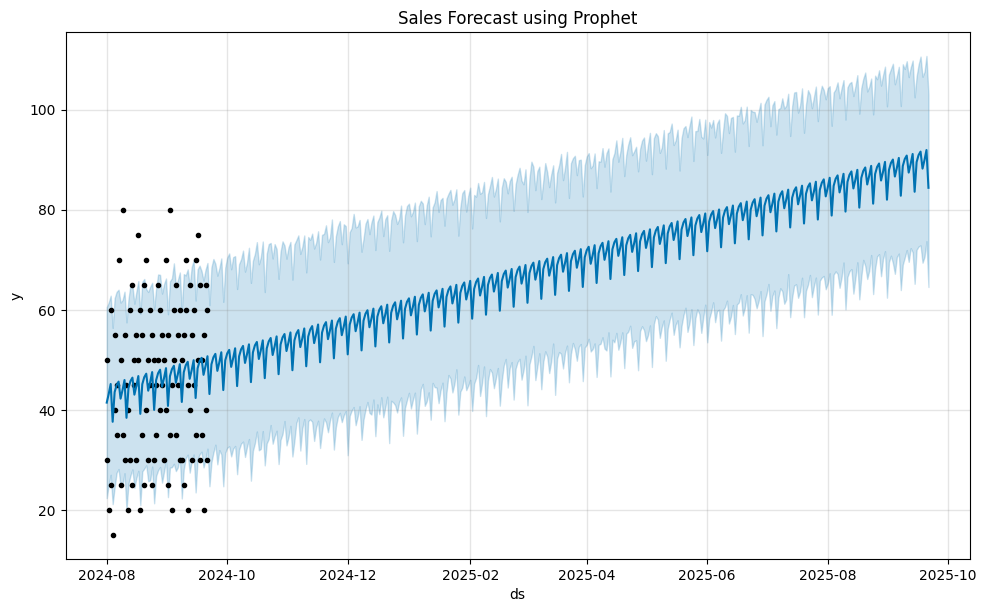

In [18]:
# Time Series Forecasting with Prophet (using Historical Sales Data)
prophet_data = df1.reset_index().rename(columns={'SalesDate': 'ds', 'QuantitySold': 'y'})
model = Prophet()
model.fit(prophet_data)

# Create future dates dataframe
future = model.make_future_dataframe(periods=365)  # Forecast for 1 year ahead
forecast = model.predict(future)

# Plot results
fig = model.plot(forecast)
plt.title('Sales Forecast using Prophet')
plt.show()

In [19]:
# Regression Analysis ( using Inventory Levels Data)
# Prepare the data
X = df2[['CurrentInventory', 'Stockouts', 'Overstock']]  # Features
y = df2['InventoryTurnoverRate']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Reinforcement Learning Setup (Example)
class InventoryEnv(gym.Env):
    def __init__(self, inventory_data):
        super(InventoryEnv, self).__init__()
        self.inventory_data = inventory_data
        self.action_space = spaces.Discrete(3)  # Example actions: [Order, Do Nothing, Reduce]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(len(inventory_data.columns),), dtype=np.float32)
        self.current_step = 0

    def reset(self):
        self.current_step = 0
        return self.inventory_data.iloc[self.current_step].values

    def step(self, action):
        self.current_step += 1
        done = self.current_step >= len(self.inventory_data) - 1
        reward = self._calculate_reward(action)
        next_state = self.inventory_data.iloc[self.current_step].values
        return next_state, reward, done, {}

    def _calculate_reward(self, action):
        return random.uniform(-1, 1)

def train_reinforcement_learning(env):
    # Placeholder for RL model training (e.g., Q-learning, DQN)
    pass

def simulate_inventory(env):
    total_reward = 0
    state = env.reset()
    done = False

    while not done:
        action = env.action_space.sample()  # Random action for demonstration
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = next_state

    print(f'Total Simulation Reward: {total_reward}')

inventory_data = df2  # Use inventory data for the RL environment
env = InventoryEnv(inventory_data)
simulate_inventory(env)

Mean Squared Error: 0.24574199460698126
Total Simulation Reward: -4.47573628583657


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from prophet import Prophet

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Calculate performance metrics for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Reinforcement Learning Setup (Example)
class InventoryEnv(gym.Env):
    def __init__(self, inventory_data):
        super(InventoryEnv, self).__init__()
        self.inventory_data = inventory_data
        self.action_space = spaces.Discrete(3)  # Example actions: [Order, Do Nothing, Reduce]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(len(inventory_data.columns),), dtype=np.float32)
        self.current_step = 0

    def reset(self):
        self.current_step = 0
        return self.inventory_data.iloc[self.current_step].values

    def step(self, action):
        self.current_step += 1
        done = self.current_step >= len(self.inventory_data) - 1
        reward = self._calculate_reward(action)
        next_state = self.inventory_data.iloc[self.current_step].values
        return next_state, reward, done, {}

    def _calculate_reward(self, action):
        return random.uniform(-1, 1)

def train_reinforcement_learning(env):
    # Placeholder for RL model training (e.g., Q-learning, DQN)
    pass

def simulate_inventory(env):
    total_reward = 0
    state = env.reset()
    done = False

    while not done:
        action = env.action_space.sample()  # Random action for demonstration
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = next_state

    print(f'Total Simulation Reward: {total_reward}')

inventory_data = df2  # Use inventory data for the RL environment
env = InventoryEnv(inventory_data)
simulate_inventory(env)

# Descriptive Statistics
print("Descriptive Statistics for Historical Sales Data:")
print(df1.describe())

print("Descriptive Statistics for Inventory Levels Data:")
print(df2.describe())

print("Descriptive Statistics for Market Trends Data:")
print(df3.describe())

print("Descriptive Statistics for Supplier Performance Data:")
print(df4.describe())

Mean Squared Error: 0.24574199460698126
R^2 Score: 0.7016245815845298
Total Simulation Reward: -0.47197975866507
Descriptive Statistics for Historical Sales Data:
        ProductID  QuantitySold  CustomerID
count  100.000000    100.000000  100.000000
mean    50.500000     46.000000  150.500000
std     29.011492     15.843298   29.011492
min      1.000000     15.000000  101.000000
25%     25.750000     30.000000  125.750000
50%     50.500000     45.000000  150.500000
75%     75.250000     60.000000  175.250000
max    100.000000     80.000000  200.000000
Descriptive Statistics for Inventory Levels Data:
       CurrentInventory  Stockouts  Overstock  InventoryTurnoverRate
count         50.000000  50.000000   50.00000              50.000000
mean         105.100000   1.380000    1.78000               4.842000
std           39.750369   1.227076    1.37455               1.077808
min           40.000000   0.000000    0.00000               2.800000
25%           80.000000   0.000000    1.00000 

Correlation Analysis:

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Print column names and the first few rows of each dataframe to verify
print("Historical Sales Data Columns:", df1.columns)
print("Historical Sales Data Sample:", df1.head())

print("Inventory Levels Data Columns:", df2.columns)
print("Inventory Levels Data Sample:", df2.head())

print("Market Trends Columns:", df3.columns)
print("Market Trends Sample:", df3.head())

print("Supplier Performance Data Columns:", df4.columns)
print("Supplier Performance Data Sample:", df4.head())


Historical Sales Data Columns: Index(['ProductID', 'ProductCategory', 'QuantitySold', 'CustomerID'], dtype='object')
Historical Sales Data Sample:             ProductID ProductCategory  QuantitySold  CustomerID
SalesDate                                                      
2024-08-01          1    Industrial A            50         101
2024-08-01          2    Industrial B            30         102
2024-08-02          3    Industrial C            20         103
2024-08-03          4    Industrial A            60         104
2024-08-03          5    Industrial B            25         105
Inventory Levels Data Columns: Index(['ProductID', 'ProductCategory', 'CurrentInventory', 'Stockouts',
       'Overstock', 'InventoryTurnoverRate'],
      dtype='object')
Inventory Levels Data Sample:   ProductID ProductCategory  CurrentInventory  Stockouts  Overstock  \
0         1    Industrial A               120          2          1   
1         2    Industrial B                80          1      

In [28]:
df1['ProductID'] = df1['ProductID'].astype(int)
df2['ProductID'] = df2['ProductID'].astype(int)
df4['SupplierID'] = df4['SupplierID'].astype(int)

Column 'Date' is missing in Market Trends dataset.


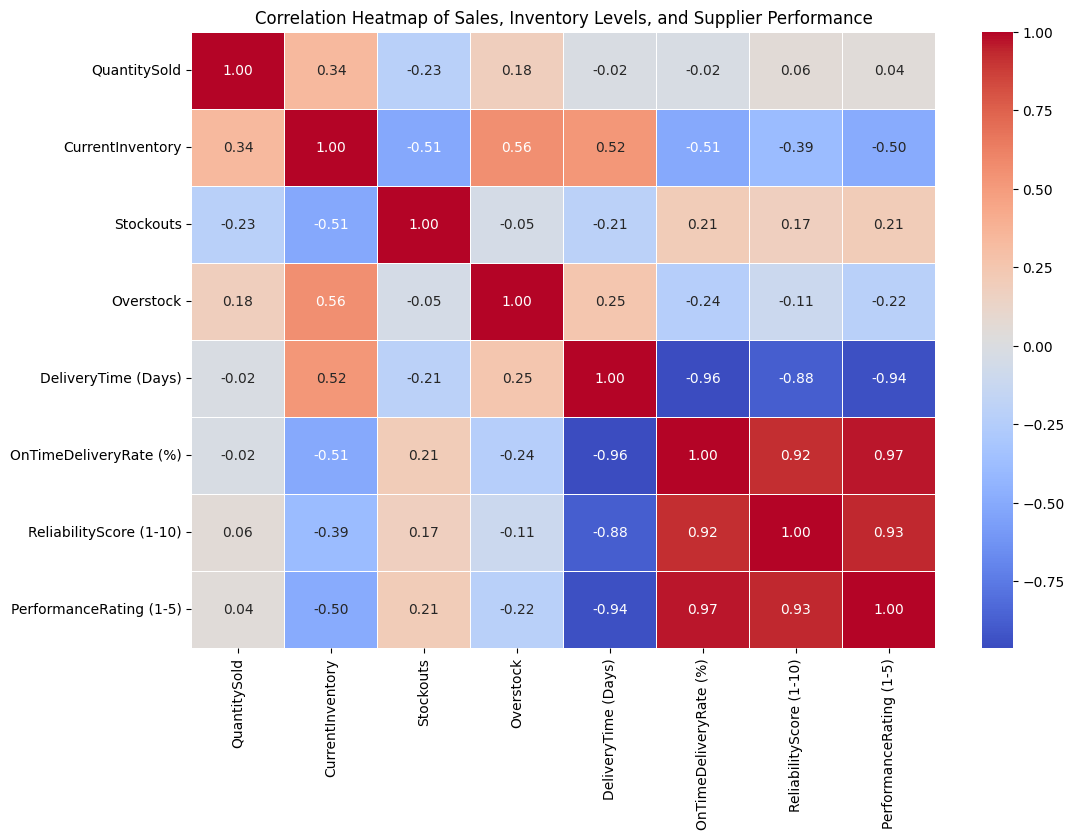

Correlation Matrix:
                         QuantitySold  CurrentInventory  Stockouts  Overstock  \
QuantitySold                 1.000000          0.335319  -0.225545   0.182740   
CurrentInventory             0.335319          1.000000  -0.511243   0.562543   
Stockouts                   -0.225545         -0.511243   1.000000  -0.046221   
Overstock                    0.182740          0.562543  -0.046221   1.000000   
DeliveryTime (Days)         -0.016979          0.522430  -0.207808   0.254796   
OnTimeDeliveryRate (%)      -0.020473         -0.508343   0.210393  -0.240534   
ReliabilityScore (1-10)      0.056284         -0.389525   0.173726  -0.108007   
PerformanceRating (1-5)      0.042610         -0.497466   0.205979  -0.224961   

                         DeliveryTime (Days)  OnTimeDeliveryRate (%)  \
QuantitySold                       -0.016979               -0.020473   
CurrentInventory                    0.522430               -0.508343   
Stockouts                         

In [30]:
# Convert 'SalesDate' to datetime if it's in df1
if 'SalesDate' in df1.columns:
    df1['SalesDate'] = pd.to_datetime(df1.index, errors='coerce')
    df1.set_index('SalesDate', inplace=True)

# Aggregate sales data by ProductID
monthly_sales = df1.groupby(['ProductID', 'ProductCategory'])['QuantitySold'].sum().reset_index()

# Merge sales data with inventory levels
inventory_sales = pd.merge(monthly_sales, df2, on='ProductID', how='left')

# Prepare Market Trends data
if 'Date' in df3.columns:
    df3['Date'] = pd.to_datetime(df3['Date'], errors='coerce')
    df3 = df3.dropna(subset=['Date'])
else:
    print("Column 'Date' is missing in Market Trends dataset.")

# Check and rename columns if necessary
df3.rename(columns={'Date': 'MarketDate'}, inplace=True)

# If needed, merge df3 with other dataframes based on a common column or create relevant features
# For simplicity, this example will not merge df3 with inventory_sales

# Merge with supplier performance data on 'ProductID' assumed to be the common identifier
# Here assuming ProductID matches with SupplierID for the example
inventory_sales = pd.merge(inventory_sales, df4, left_on='ProductID', right_on='SupplierID', how='left')

# Drop rows with missing values in key columns
inventory_sales = inventory_sales.dropna(subset=['QuantitySold', 'CurrentInventory', 'Stockouts', 'Overstock', 'DeliveryTime (Days)', 'OnTimeDeliveryRate (%)', 'ReliabilityScore (1-10)', 'PerformanceRating (1-5)'])

# Calculate Correlation Matrix
correlation_matrix = inventory_sales[['QuantitySold', 'CurrentInventory', 'Stockouts', 'Overstock', 'DeliveryTime (Days)', 'OnTimeDeliveryRate (%)', 'ReliabilityScore (1-10)', 'PerformanceRating (1-5)']].corr()

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Sales, Inventory Levels, and Supplier Performance')
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Time Series Forecasting with ARIMA and Prophet

ARIMA Forecasting

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet


data = {
    'SalesDate': [
        '2024-08-01', '2024-08-01', '2024-08-02', '2024-08-03', '2024-08-03',
        '2024-09-19', '2024-09-20', '2024-09-20', '2024-09-21', '2024-09-21'
    ],
    'ProductID': [1, 2, 3, 4, 5, 96, 97, 98, 99, 100],
    'ProductCategory': ['Industrial A', 'Industrial B', 'Industrial C', 'Industrial A', 'Industrial B',
                         'Industrial D', 'Industrial A', 'Industrial B', 'Industrial C', 'Industrial D'],
    'QuantitySold': [50, 30, 20, 60, 25, 55, 65, 40, 30, 60],
    'CustomerID': [101, 102, 103, 104, 105, 196, 197, 198, 199, 200]
}

df = pd.DataFrame(data)
df['SalesDate'] = pd.to_datetime(df['SalesDate'])
df.set_index('SalesDate', inplace=True)

# Aggregate sales by date
daily_sales = df.groupby(df.index).agg({'QuantitySold': 'sum'}).reset_index()
daily_sales.rename(columns={'SalesDate': 'ds', 'QuantitySold': 'y'}, inplace=True)


ARIMA Forecasting

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associ

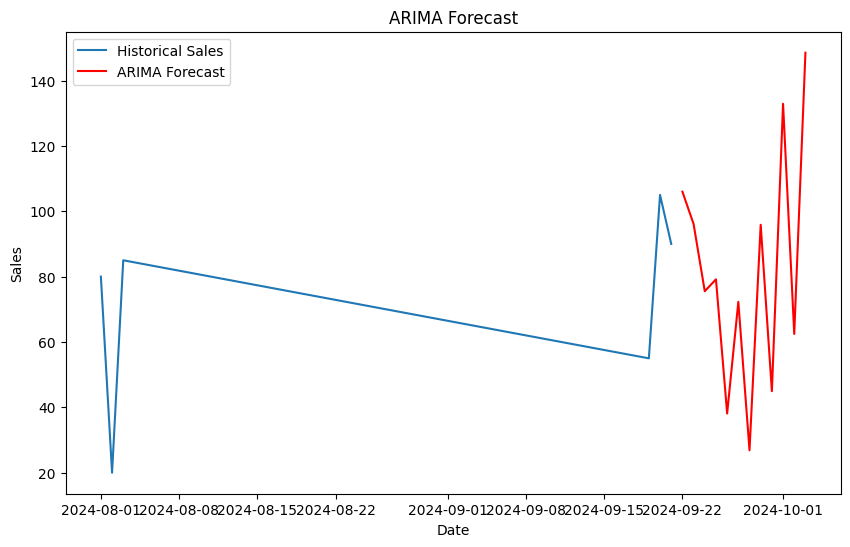

In [43]:
# ARIMA Forecast Function
def arima_forecast(data, order=(5, 1, 0), steps=12):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Prepare data
ts_data = daily_sales.set_index('ds')['y']

# Forecast the next 12 days
forecast = arima_forecast(ts_data)
forecast_index = pd.date_range(start=ts_data.index[-1] + pd.DateOffset(1), periods=12, freq='D')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Historical Sales')
plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


Prophet Forecasting

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpubp4vi4w/476pi6_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpubp4vi4w/emyvodbs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=984', 'data', 'file=/tmp/tmpubp4vi4w/476pi6_o.json', 'init=/tmp/tmpubp4vi4w/emyvodbs.json', 'output', 'file=/tmp/tmpubp4vi4w/prophet_modeln0c1ih_s/prophet_model-20240916102019.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:20:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:20:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

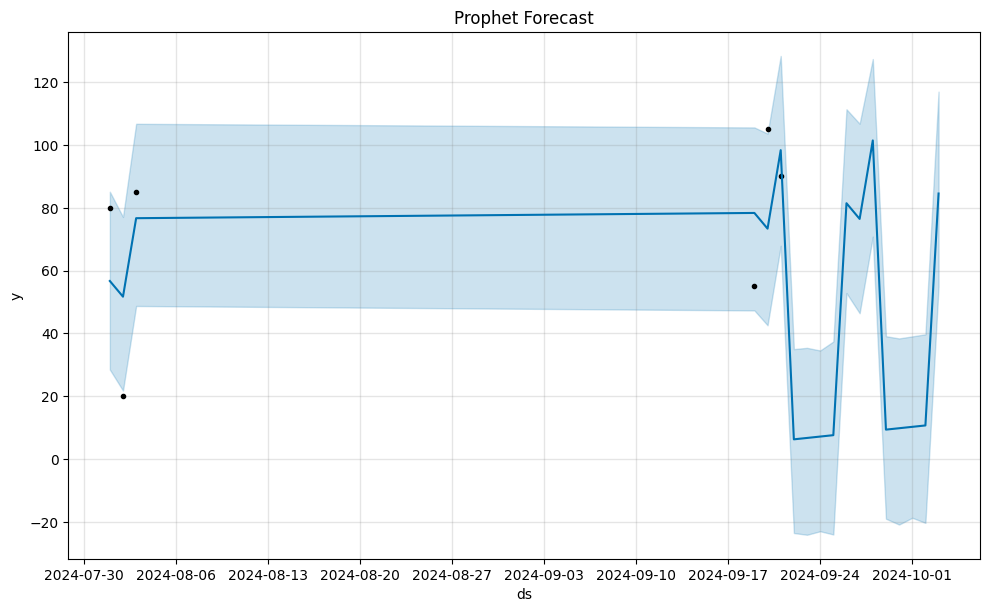

In [44]:
# Prophet Forecast Function
model = Prophet()
model.fit(daily_sales)

# Future DataFrame
future = model.make_future_dataframe(periods=12, freq='D')
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()


Reinforcement Learning for Inventory Optimization

In [48]:
import numpy as np

# Parameters
n_states = 10  # Number of possible inventory levels (example)
n_actions = 3  # Number of actions (e.g., order more, order less, keep same)
n_episodes = 1000
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    td_target = reward + discount_factor * Q[next_state][best_next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += learning_rate * td_error

# Simulation loop
for episode in range(n_episodes):
    state = np.random.randint(n_states)  # Initial state
    done = False

    while not done:
        action = choose_action(state)
        next_state = (state + action - 1) % n_states  # Example state transition
        reward = np.random.rand()  # Example reward based on sales data
        update_q_table(state, action, reward, next_state)

        state = next_state
        done = np.random.rand() < 0.01  # Example termination condition



# Print Q-table
print("Q-table after training:")
print(Q)


Q-table after training:
[[4.86727208 4.87679667 5.07464528]
 [5.16855943 5.02671704 4.96257048]
 [5.13414514 4.86466976 4.84302154]
 [4.92237827 4.84654577 4.84164743]
 [4.81384118 4.83549487 4.86513838]
 [4.84467641 4.8554886  4.93768224]
 [4.88694347 4.96984731 4.97558943]
 [4.88754981 4.85496368 5.03065765]
 [4.94560961 4.90515239 4.93510897]
 [4.90639295 4.90427868 4.88003914]]


Train models

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [52]:
# Display column names for each DataFrame
print("Columns in Historical Sales Data:")
print(df1.columns)

print("\nColumns in Inventory Levels Dataset:")
print(df2.columns)

print("\nColumns in Market Trends:")
print(df3.columns)

print("\nColumns in Supplier Performance Data:")
print(df4.columns)


Columns in Historical Sales Data:
Index(['ProductID', 'ProductCategory', 'QuantitySold', 'CustomerID'], dtype='object')

Columns in Inventory Levels Dataset:
Index(['ProductID', 'ProductCategory', 'CurrentInventory', 'Stockouts',
       'Overstock', 'InventoryTurnoverRate'],
      dtype='object')

Columns in Market Trends:
Index(['EconomicIndicator', 'MarketTrend', 'SeasonalDemand', 'ExternalFactor'], dtype='object')

Columns in Supplier Performance Data:
Index(['SupplierID', 'SupplierName', 'DeliveryTime (Days)',
       'OnTimeDeliveryRate (%)', 'ReliabilityScore (1-10)',
       'PerformanceRating (1-5)'],
      dtype='object')


In [53]:
# Merging sales data with inventory levels data
data = pd.merge(df1, df2, on='ProductID', how='left')

# Check for NaN values and handle them (for simplicity, we fill NaNs with 0)
data = data.fillna(0)

# Feature Engineering
# We assume 'Stockouts' is the target variable for simplicity
data['Stockouts'] = data['Stockouts'].apply(lambda x: 1 if x > 0 else 0)

# Define features and target
features = ['QuantitySold', 'CurrentInventory', 'InventoryTurnoverRate']
X = data[features]
y = data['Stockouts']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on validation set
y_pred = model.predict(X_val_scaled)

# Performance Metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Calculate additional metrics
inventory_turnover = data['InventoryTurnoverRate'].mean()
holding_costs = data['CurrentInventory'].sum() * 0.1  # Assuming holding cost rate of 10%
stockout_frequency = data['Stockouts'].mean()

# Results DataFrame
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Average Inventory Turnover Rate', 'Total Holding Costs', 'Average Stockout Frequency'],
    'Value': [accuracy, precision, recall, inventory_turnover, holding_costs, stockout_frequency]
})

# Print results
print("Model Performance Metrics:")
print(results)

print("\nConfusion Matrix:")
print(conf_matrix)

Model Performance Metrics:
                            Metric    Value
0                         Accuracy    0.800
1                        Precision    0.875
2                           Recall    0.700
3  Average Inventory Turnover Rate    2.421
4              Total Holding Costs  525.500
5       Average Stockout Frequency    0.360

Confusion Matrix:
[[9 1]
 [3 7]]


Historical Sales Data

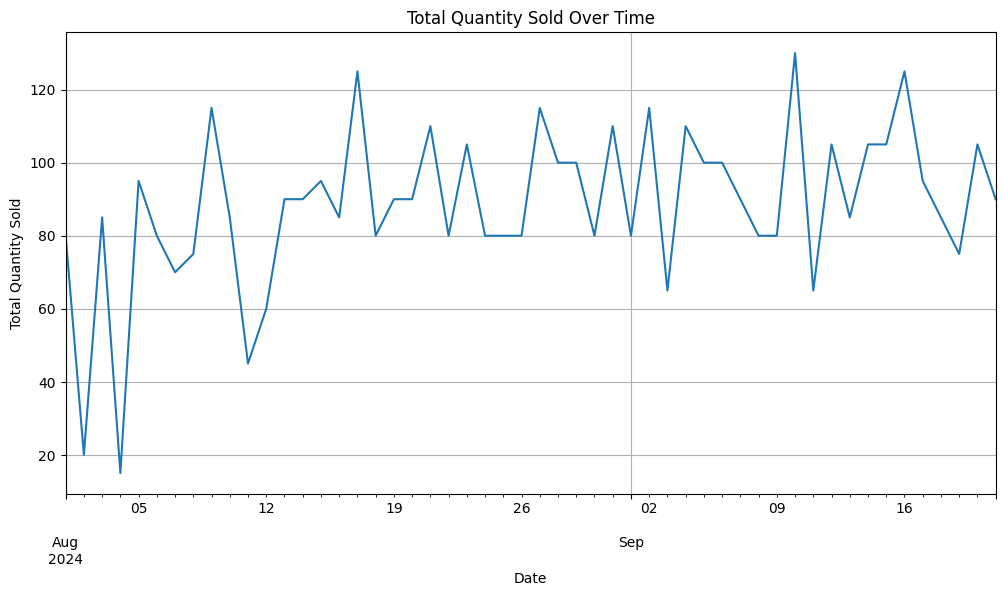

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load Historical Sales Data
df1 = pd.read_excel('/content/Historical Sales Data.xlsx')

# Plot Quantity Sold over Time
plt.figure(figsize=(12, 6))
df1['SalesDate'] = pd.to_datetime(df1['SalesDate'])
df1.groupby('SalesDate')['QuantitySold'].sum().plot()
plt.title('Total Quantity Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()


Inventory Levels Dataset

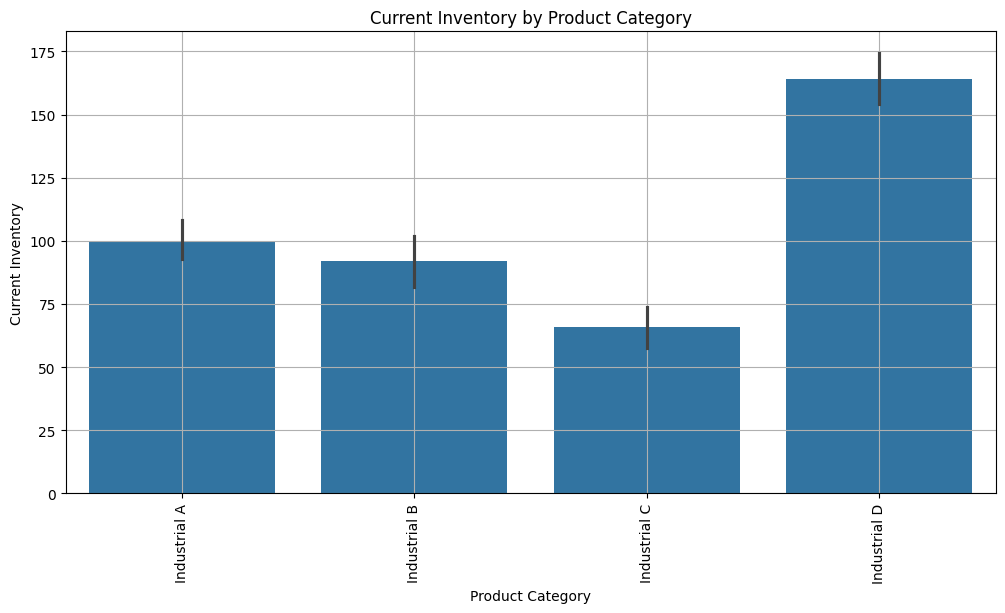

In [55]:
# Load Inventory Levels Dataset
df2 = pd.read_excel('/content/Inventory Levels Dataset.xlsx')

# Plot Current Inventory by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductCategory', y='CurrentInventory', data=df2)
plt.title('Current Inventory by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Current Inventory')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Market Trends

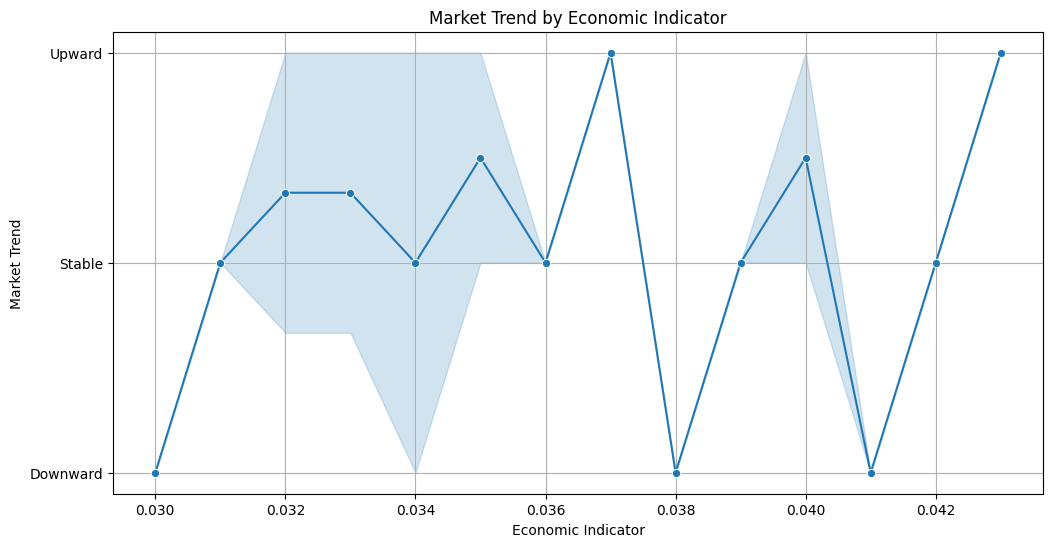

In [56]:
# Load Market Trends Data
df3 = pd.read_excel('/content/Market Trends.xlsx')

# Plot Market Trend by Economic Indicator
plt.figure(figsize=(12, 6))
sns.lineplot(x='EconomicIndicator', y='MarketTrend', data=df3, marker='o')
plt.title('Market Trend by Economic Indicator')
plt.xlabel('Economic Indicator')
plt.ylabel('Market Trend')
plt.grid(True)
plt.show()


Supplier Performance Data

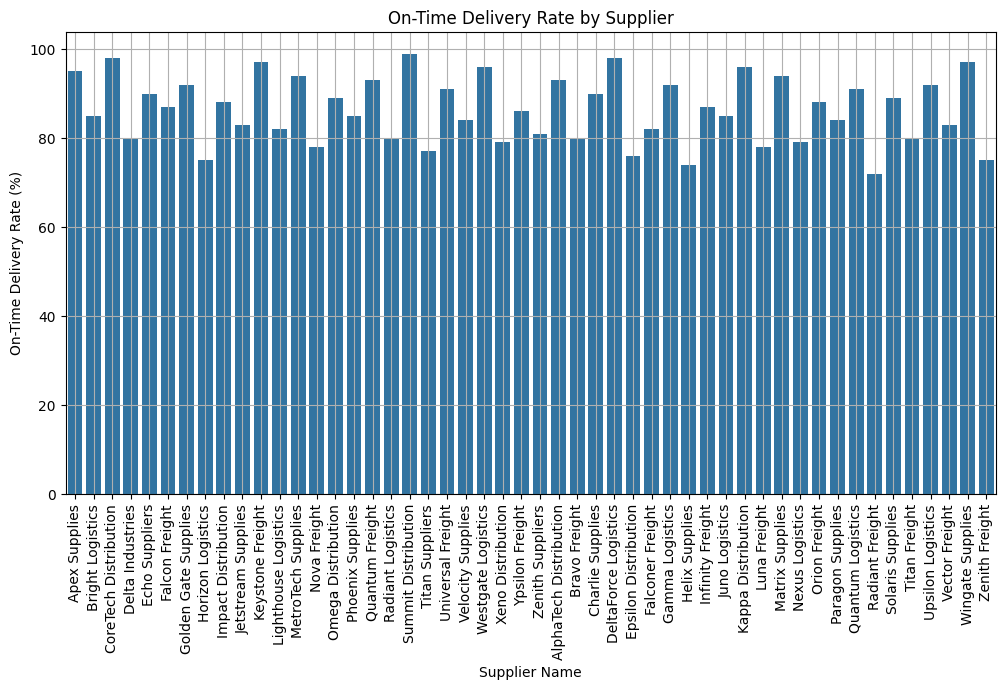

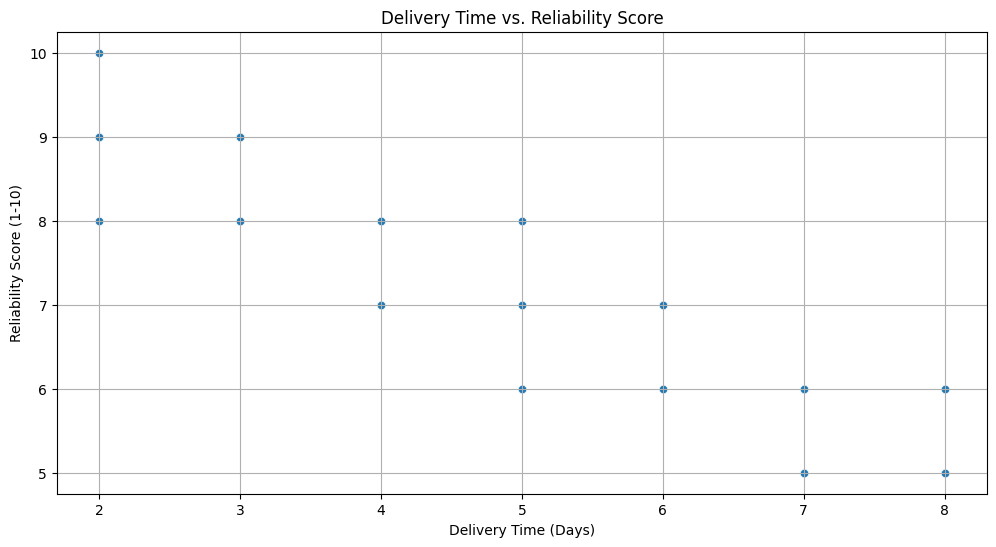

In [57]:
# Load Supplier Performance Data
df4 = pd.read_excel('/content/Supplier Performance Data.xlsx')

# Plot On-Time Delivery Rate by Supplier
plt.figure(figsize=(12, 6))
sns.barplot(x='SupplierName', y='OnTimeDeliveryRate (%)', data=df4)
plt.title('On-Time Delivery Rate by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Plot Delivery Time vs. Reliability Score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='DeliveryTime (Days)', y='ReliabilityScore (1-10)', data=df4)
plt.title('Delivery Time vs. Reliability Score')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Reliability Score (1-10)')
plt.grid(True)
plt.show()


In [63]:
import pandas as pd

# Load datasets
df1 = pd.read_excel('/content/Historical Sales Data.xlsx')
df2 = pd.read_excel('/content/Inventory Levels Dataset.xlsx')
df3 = pd.read_excel('/content/Market Trends.xlsx')
df4 = pd.read_excel('/content/Supplier Performance Data.xlsx')

# Function to compute descriptive statistics
def get_descriptive_statistics(df, columns):
    try:
        stats = df[columns].describe().T
        stats.rename(columns={'50%': 'median'}, inplace=True)
        stats = stats[['mean', 'median', 'std']]
        stats.index.name = 'Statistic'
        return stats
    except KeyError as e:
        print(f"KeyError: {e}")
        return pd.DataFrame()

# Calculate descriptive statistics for Historical Sales Data
sales_columns = ['QuantitySold']
sales_stats = get_descriptive_statistics(df1, sales_columns)
sales_stats.index = ['QuantitySold']

# Calculate descriptive statistics for Inventory Levels Dataset
inventory_columns = ['CurrentInventory', 'Stockouts', 'Overstock', 'InventoryTurnoverRate']
inventory_stats = get_descriptive_statistics(df2, inventory_columns)

# Calculate descriptive statistics for Market Trends
market_trends_columns = ['SeasonalDemand']
if 'SeasonalDemand' in df3.columns:
    market_trends_stats = get_descriptive_statistics(df3, market_trends_columns)
else:
    market_trends_stats = pd.DataFrame(index=['SeasonalDemand'], columns=['mean', 'median', 'std'])

# Calculate descriptive statistics for Supplier Performance Data
supplier_columns = ['DeliveryTime (Days)', 'OnTimeDeliveryRate (%)', 'ReliabilityScore (1-10)', 'PerformanceRating (1-5)']
supplier_stats = get_descriptive_statistics(df4, supplier_columns)

# Display the results in table format
print("Descriptive Statistics for Historical Sales Data:")
print(sales_stats.to_string())
print("\nDescriptive Statistics for Inventory Levels Dataset:")
print(inventory_stats.to_string())
print("\nDescriptive Statistics for Market Trends:")
print(market_trends_stats.to_string())
print("\nDescriptive Statistics for Supplier Performance Data:")
print(supplier_stats.to_string())


KeyError: "None of [Index(['mean', 'median', 'std'], dtype='object')] are in the [columns]"
Descriptive Statistics for Historical Sales Data:
              mean  median        std
QuantitySold  46.0    45.0  15.843298

Descriptive Statistics for Inventory Levels Dataset:
                          mean  median        std
Statistic                                        
CurrentInventory       105.100    95.0  39.750369
Stockouts                1.380     1.0   1.227076
Overstock                1.780     2.0   1.374550
InventoryTurnoverRate    4.842     5.0   1.077808

Descriptive Statistics for Market Trends:
Empty DataFrame
Columns: []
Index: []

Descriptive Statistics for Supplier Performance Data:
                           mean  median       std
Statistic                                        
DeliveryTime (Days)       4.680     4.5  1.834366
OnTimeDeliveryRate (%)   86.380    86.5  7.334264
ReliabilityScore (1-10)   7.240     7.0  1.286666
PerformanceRating (1-5)   4.006     4.0  0